#  DBSCAN

Bu ödevde, UC Irvine Machine Learning Repository'den kalp hastalığı verisi ile çalışacaksınız.

Veri seti kümeleme algoritmasına geçmeden önce bazı işlemlere ihtiyaç duymaktadır.

#Değişkenleri belirleme
  X = heartdisease_df.iloc[:, :13]
  y = heartdisease_df.iloc[:, 13]

#"?" işareti olan değerleri 0 ile değiştirme 
  X = X.replace(to_replace='?', value=0)

#Hedef değişkeni 1 ve 0 olarak değiştirme? 
  y = np.where(y > 0, 0, 1)
Burada, X sizin değişkenleriniz olacak ve y içinde etiketleri tutuyoruz. Y, 1'e eşitse, hastanın kalp hastası olduğu ve y 0'a eşit olduğunda, hastanın kalp hastalığı olmadığı sonucuna varıyoruz.



Ödevi tamamlamak için aşağıdaki soruların cevabını içeren Jupyter notebook'u sisteme yükleyiniz:

- Değişik eps ve min_samples değerleri deneyerek DBSCAN metodunu uygulayın. İki kümeli çözüm üretmenin pek kolay olmadığını göreceksiniz.

- eps = 1, min_samples = 1, metric =" euclidean " şeklinde parametreleri ayarlayarak DBSCAN uygulayın. Ardından, min_samples değerini artırın. Artışın kümelerinin sayısı üzerindeki etkisi nedir?

- eps = 1, min_samples = 1, metric =" euclidean " şeklinde parametreleri ayarlayarak DBSCAN uygulayın. Ardından, eps değerini artırın. Artışın kümelerinin sayısı üzerindeki etkisi nedir?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
import warnings
warnings.filterwarnings('ignore')
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


heartdisease_df = pd.read_csv('cleveland-0_vs_4.csv')

In [2]:
for i in ["ca", "thal", "num"]:
    print(f"{i} Column values:\n {heartdisease_df[i].unique()}\n")

ca Column values:
 ['0.0' '2.0' '1.0' '3.0' '<null>']

thal Column values:
 ['6.0' '3.0' '7.0' '<null>']

num Column values:
 ['negative' 'positive']



In [3]:
# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
heartdisease_df.num = heartdisease_df.num.replace('negative', 0)
heartdisease_df.num = heartdisease_df.num.replace('positive', 1)

In [4]:
print(heartdisease_df.loc[heartdisease_df['ca'] == '<null>'])
print(heartdisease_df.loc[heartdisease_df['thal'] == '<null>'])

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
85   52.0  1.0  3.0     138.0  223.0  0.0      0.0    169.0    0.0      0.0   
142  58.0  1.0  2.0     125.0  220.0  0.0      0.0    144.0    0.0      0.4   
146  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope      ca thal  num  
85     1.0  <null>  3.0    0  
142    2.0  <null>  7.0    0  
146    1.0  <null>  3.0    0  
     age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
44  53.0  0.0  3.0     128.0  216.0  0.0      2.0    115.0    0.0      0.0   

    slope   ca    thal  num  
44    1.0  0.0  <null>    0  


In [5]:
heartdisease_df = heartdisease_df.drop([44,85,142,146])

In [6]:
heartdisease_df = heartdisease_df.dropna()
heartdisease_df.drop(heartdisease_df.tail(1).index,inplace=True)

In [7]:
heartdisease_df = heartdisease_df.reset_index(drop=True)

In [8]:
heartdisease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       172 non-null    float64
 1   sex       172 non-null    float64
 2   cp        172 non-null    float64
 3   trestbps  172 non-null    float64
 4   chol      172 non-null    float64
 5   fbs       172 non-null    float64
 6   restecg   172 non-null    float64
 7   thalach   172 non-null    float64
 8   exang     172 non-null    float64
 9   oldpeak   172 non-null    float64
 10  slope     172 non-null    float64
 11  ca        172 non-null    object 
 12  thal      172 non-null    object 
 13  num       172 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 18.9+ KB


In [9]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

## 1. Değişik eps ve min_samples değerleri deneyerek DBSCAN metodunu uygulayın. İki kümeli çözüm üretmenin pek kolay olmadığını göreceksiniz.

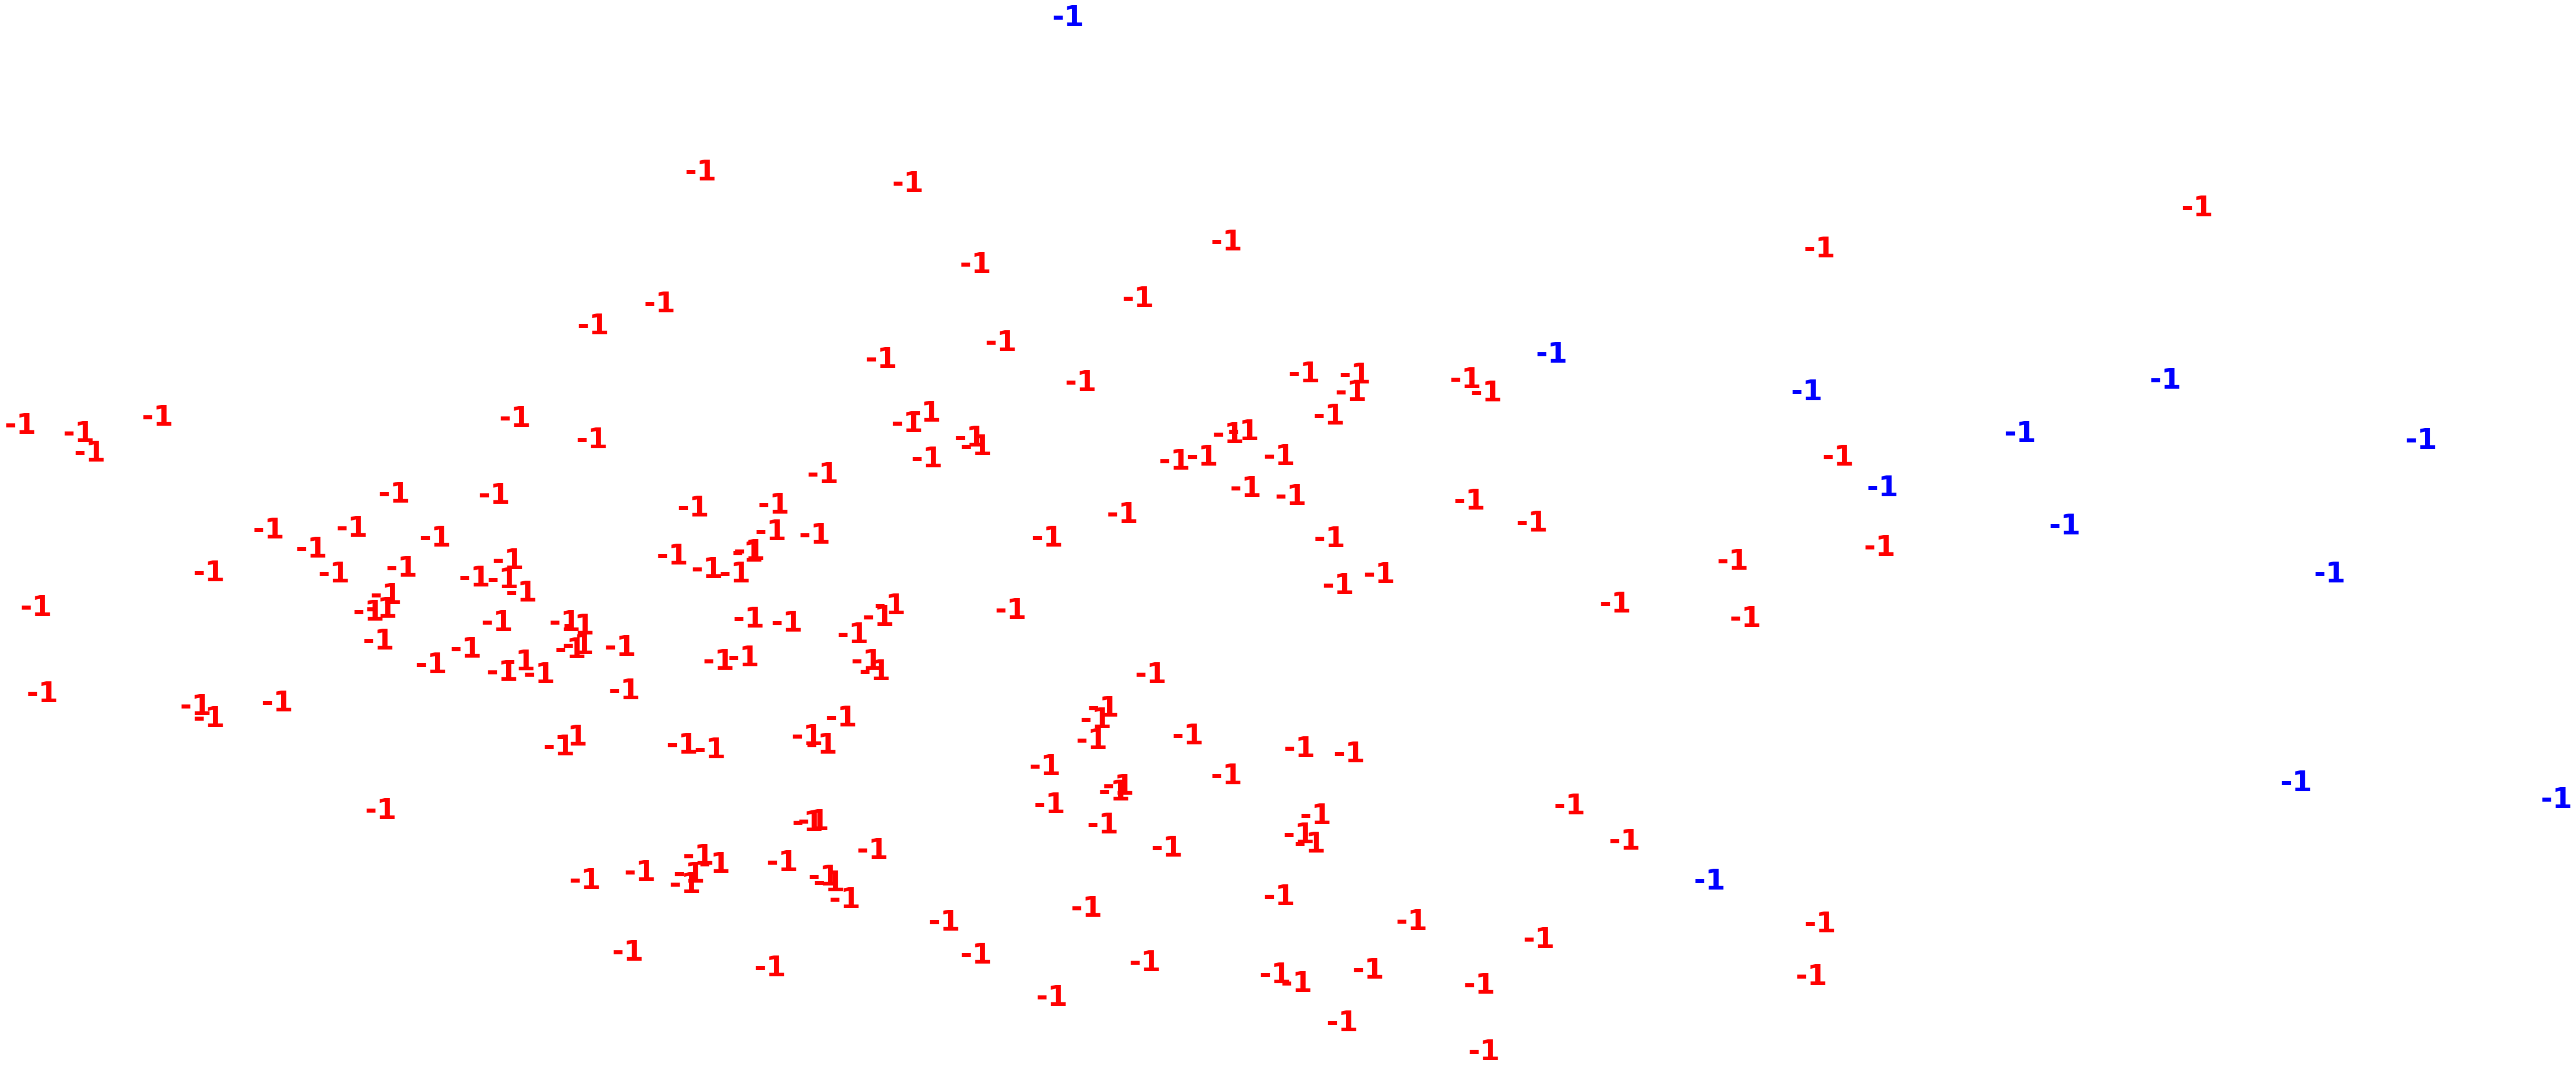

In [10]:
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

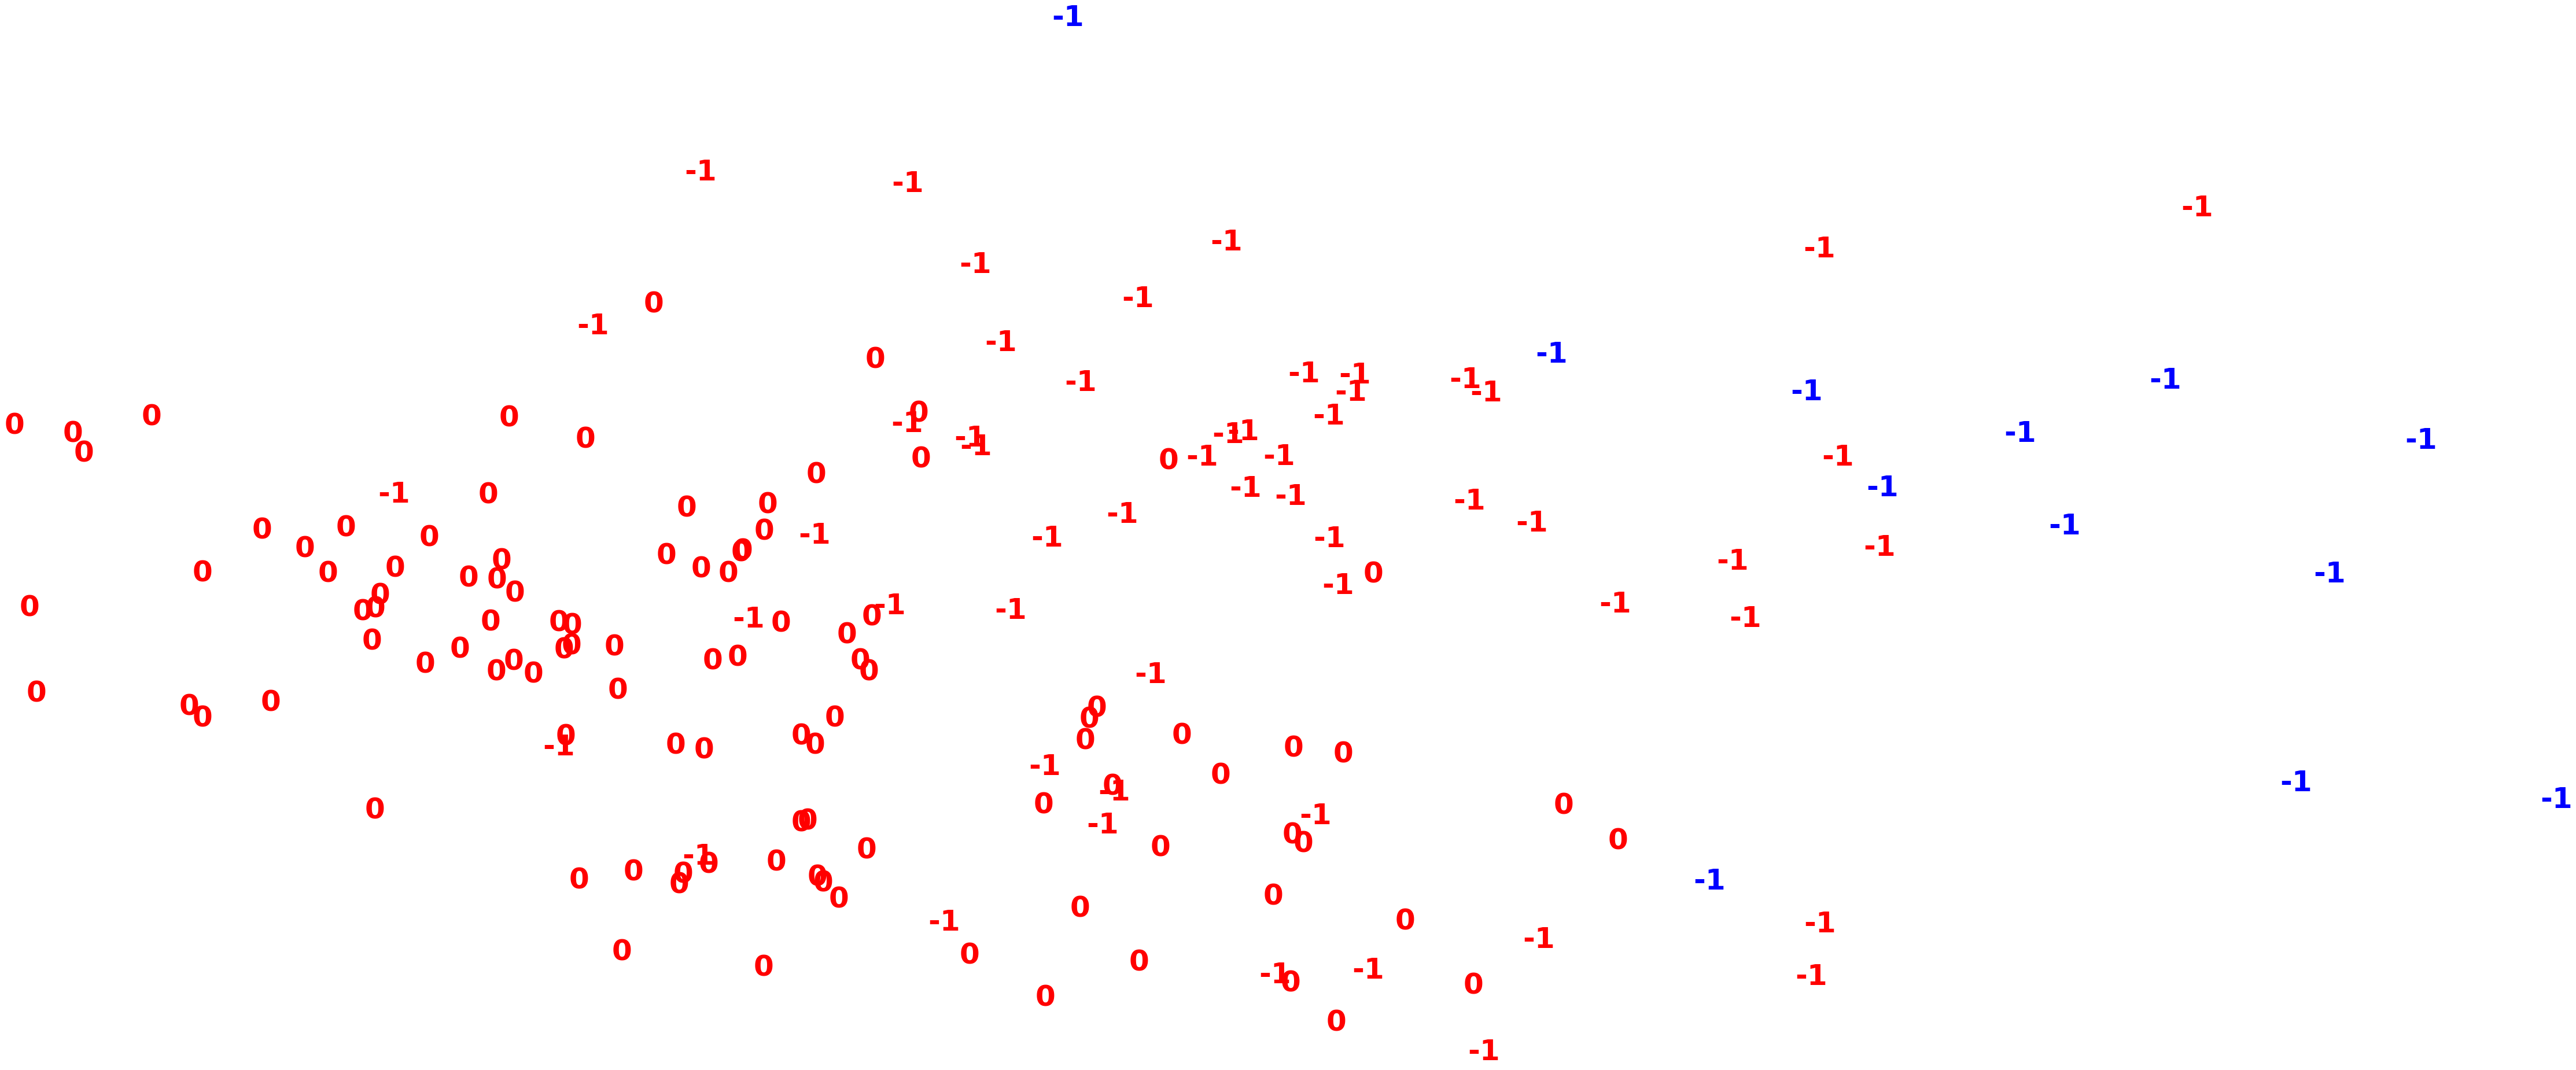

In [54]:
dbscan_cluster2 = DBSCAN(eps=3, min_samples=10)

clusters2 = dbscan_cluster2.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters2[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## 2. eps = 1, min_samples = 1, metric =" euclidean " şeklinde parametreleri ayarlayarak DBSCAN uygulayın. Ardından, min_samples değerini artırın. Artışın kümelerinin sayısı üzerindeki etkisi nedir?

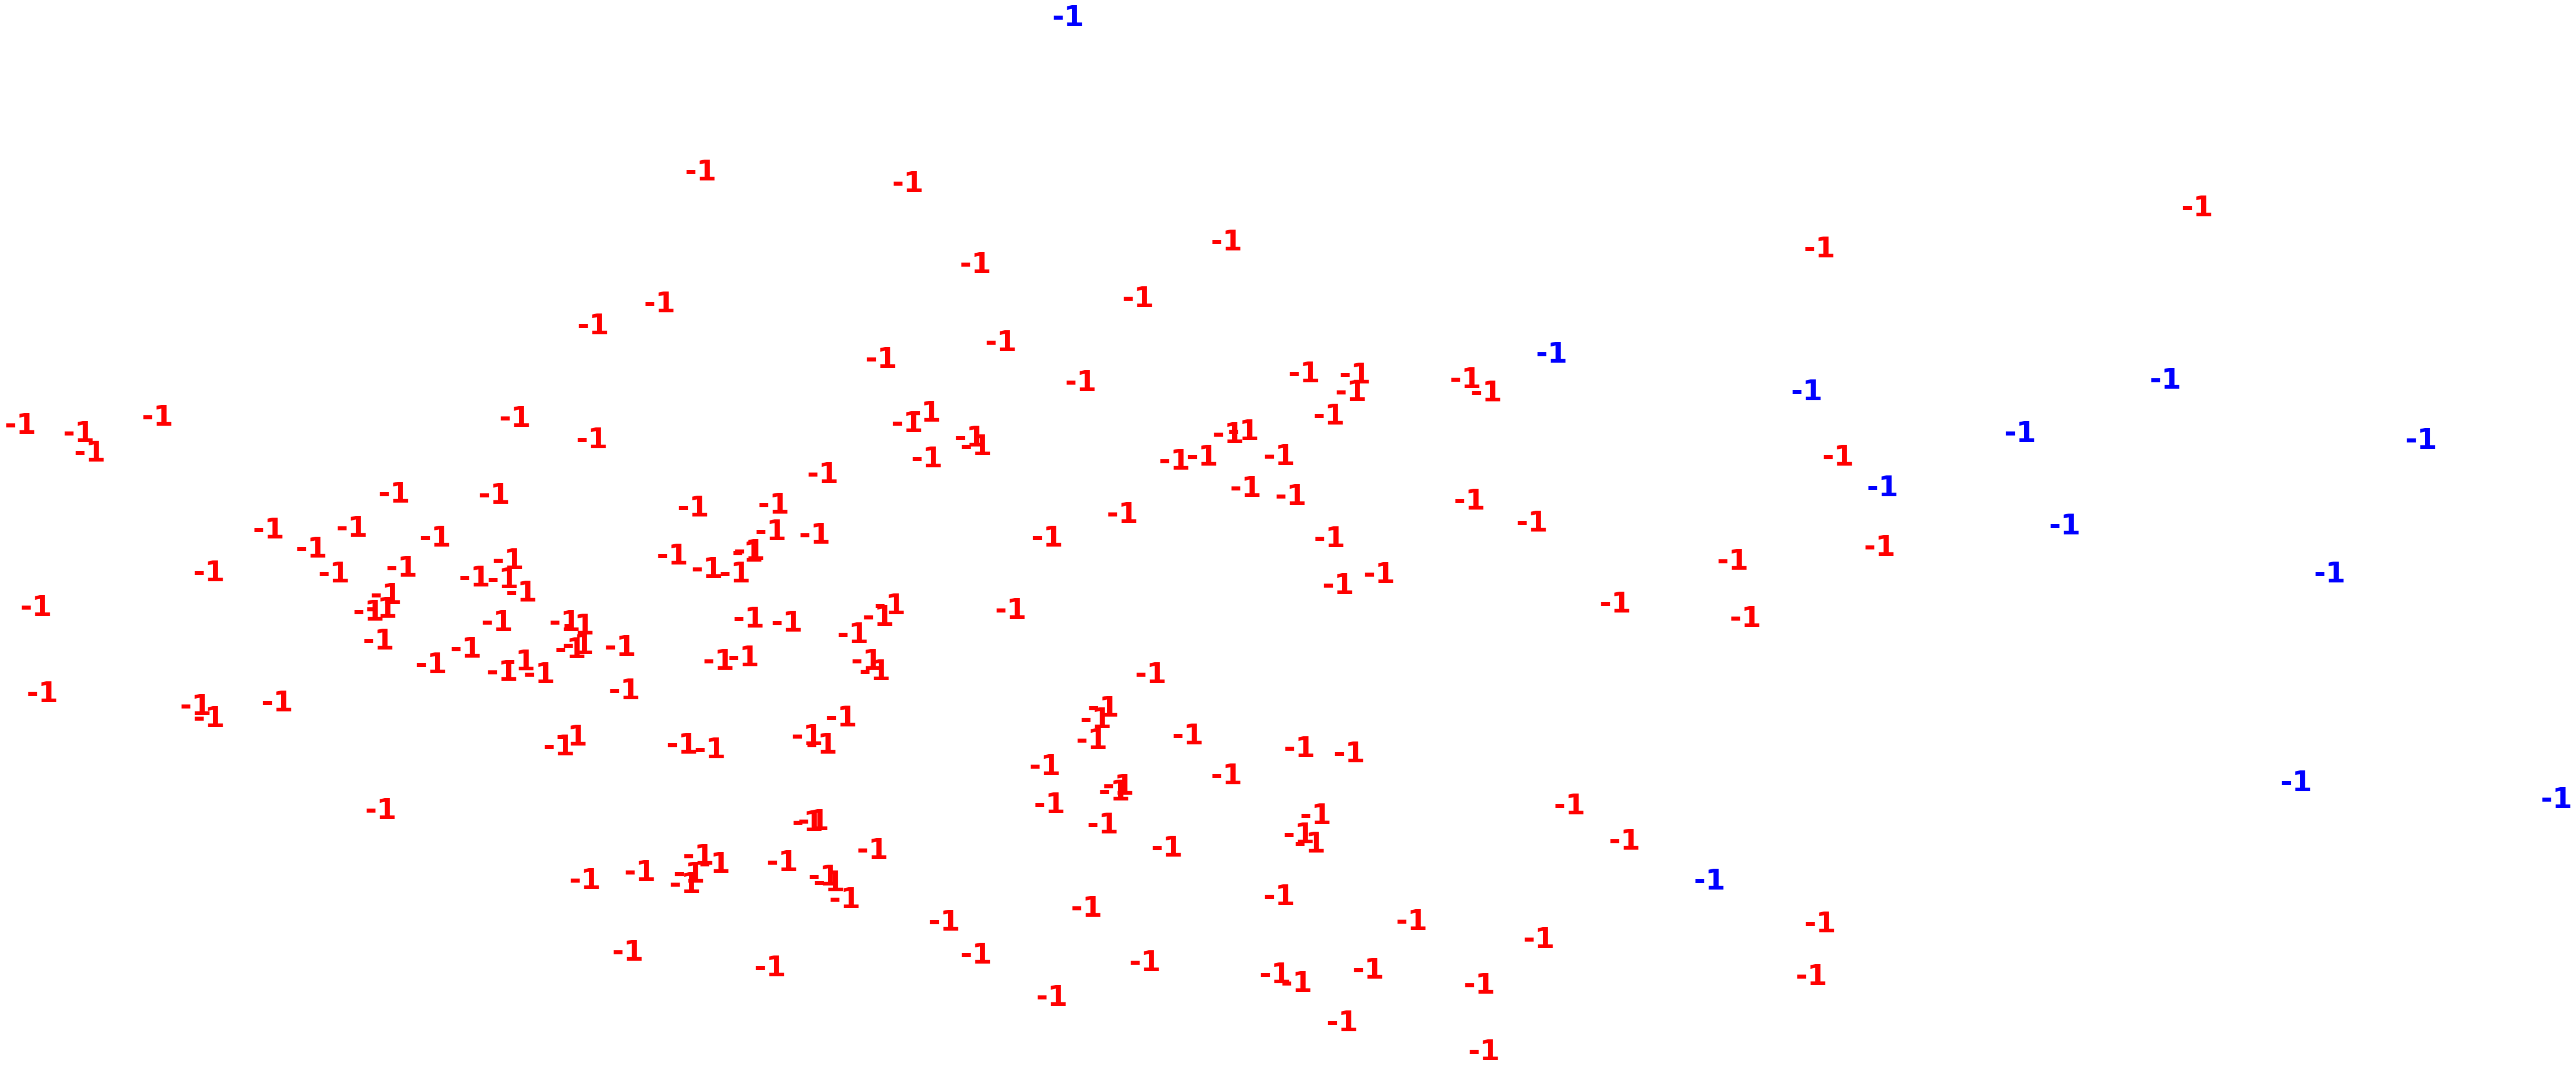

In [55]:
dbscan_cluster3 = DBSCAN(eps=1, min_samples=11)

clusters3 = dbscan_cluster3.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters3[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

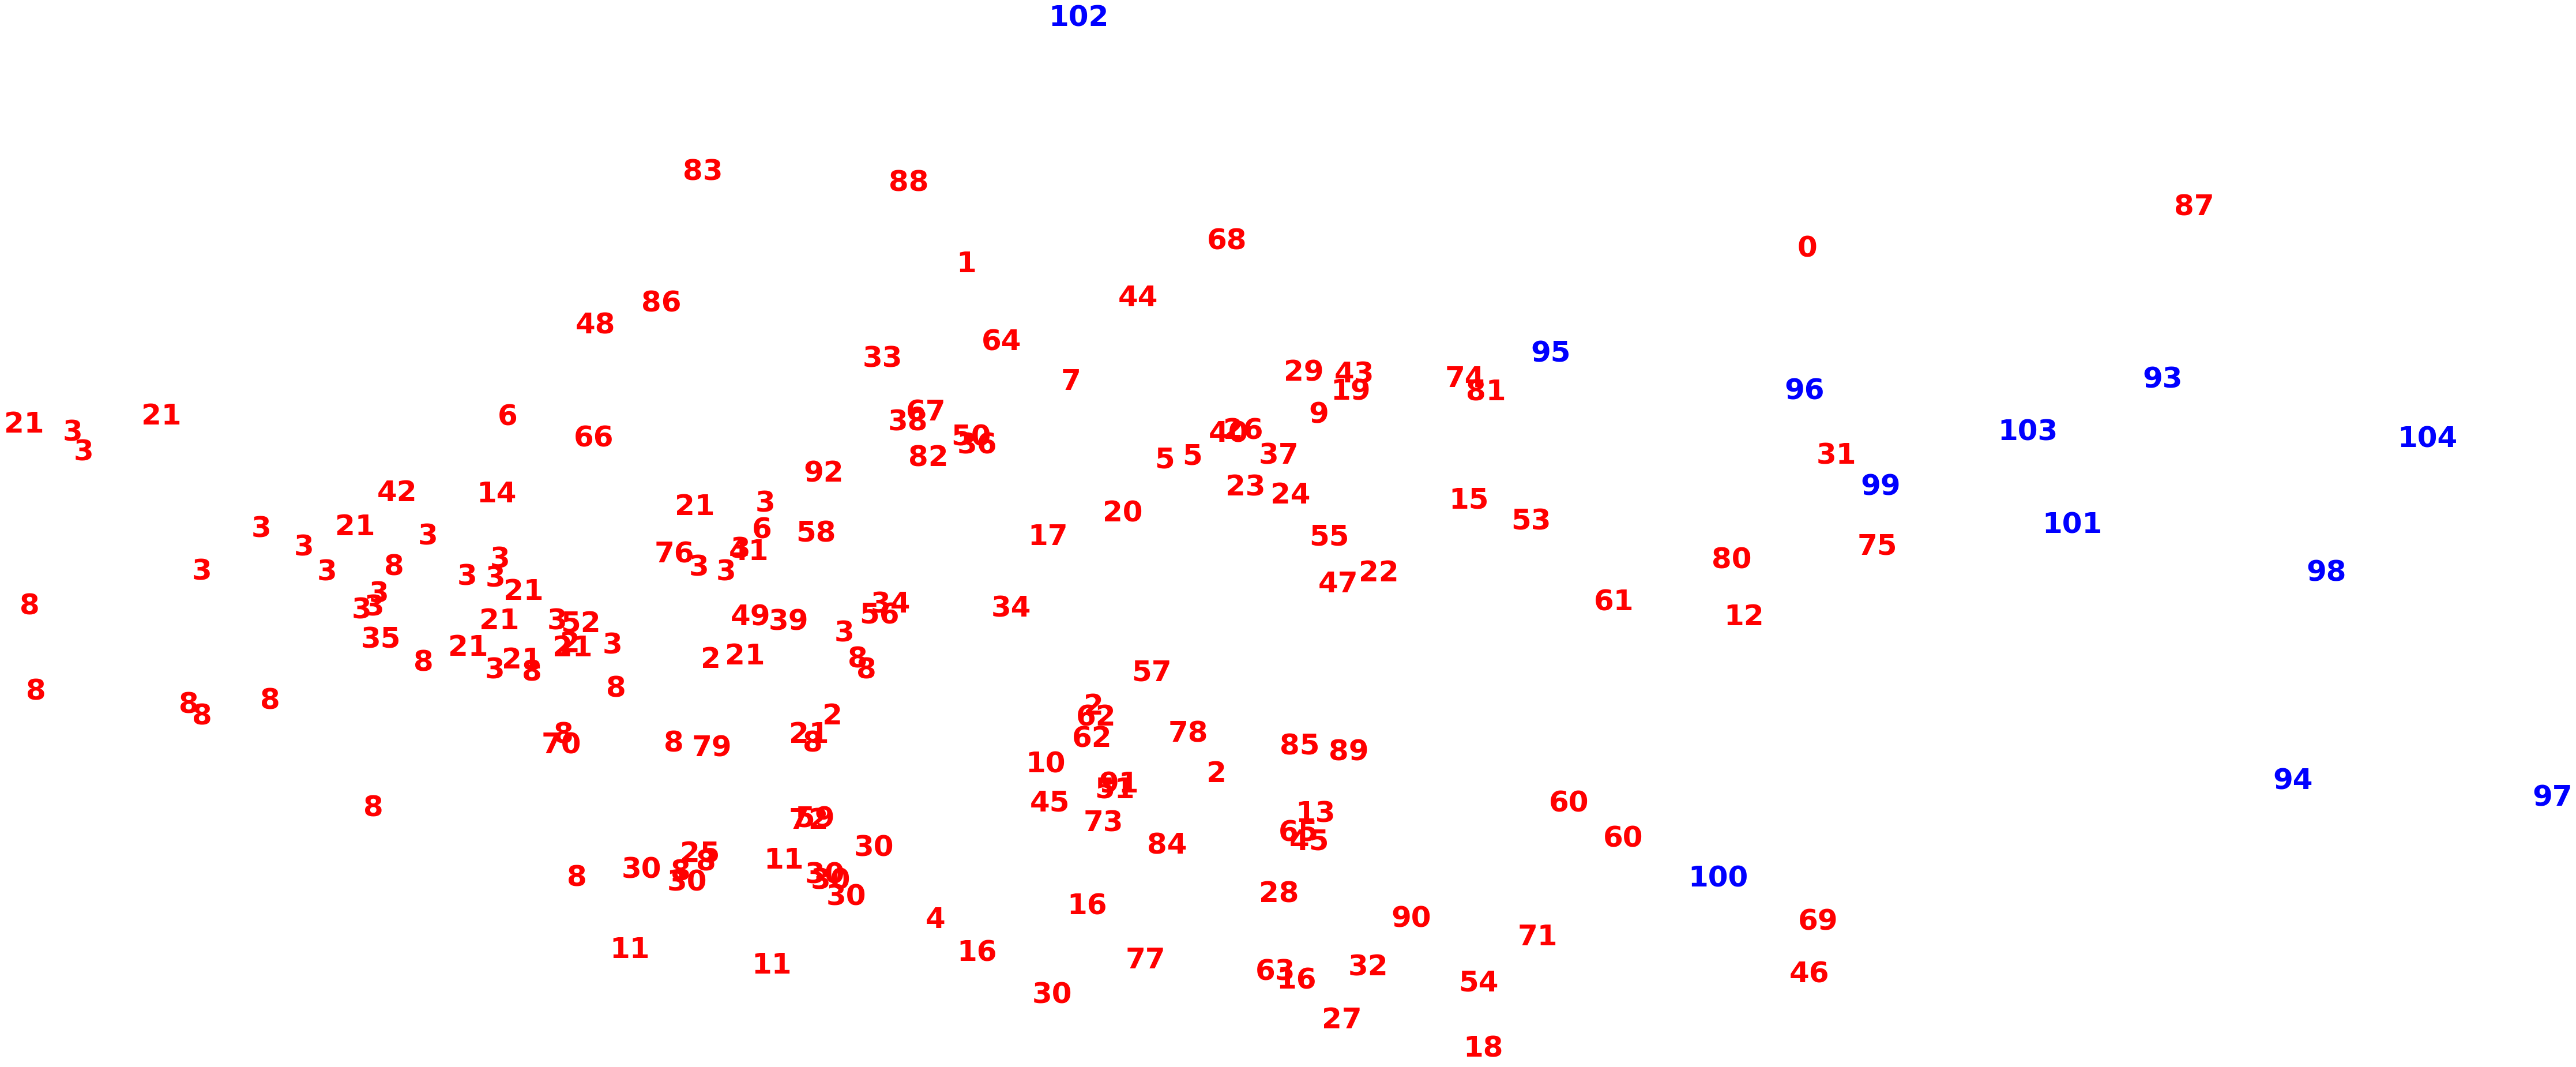

In [56]:
dbscan_cluster4 = DBSCAN(eps=2, min_samples=1)

clusters4 = dbscan_cluster4.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters4[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

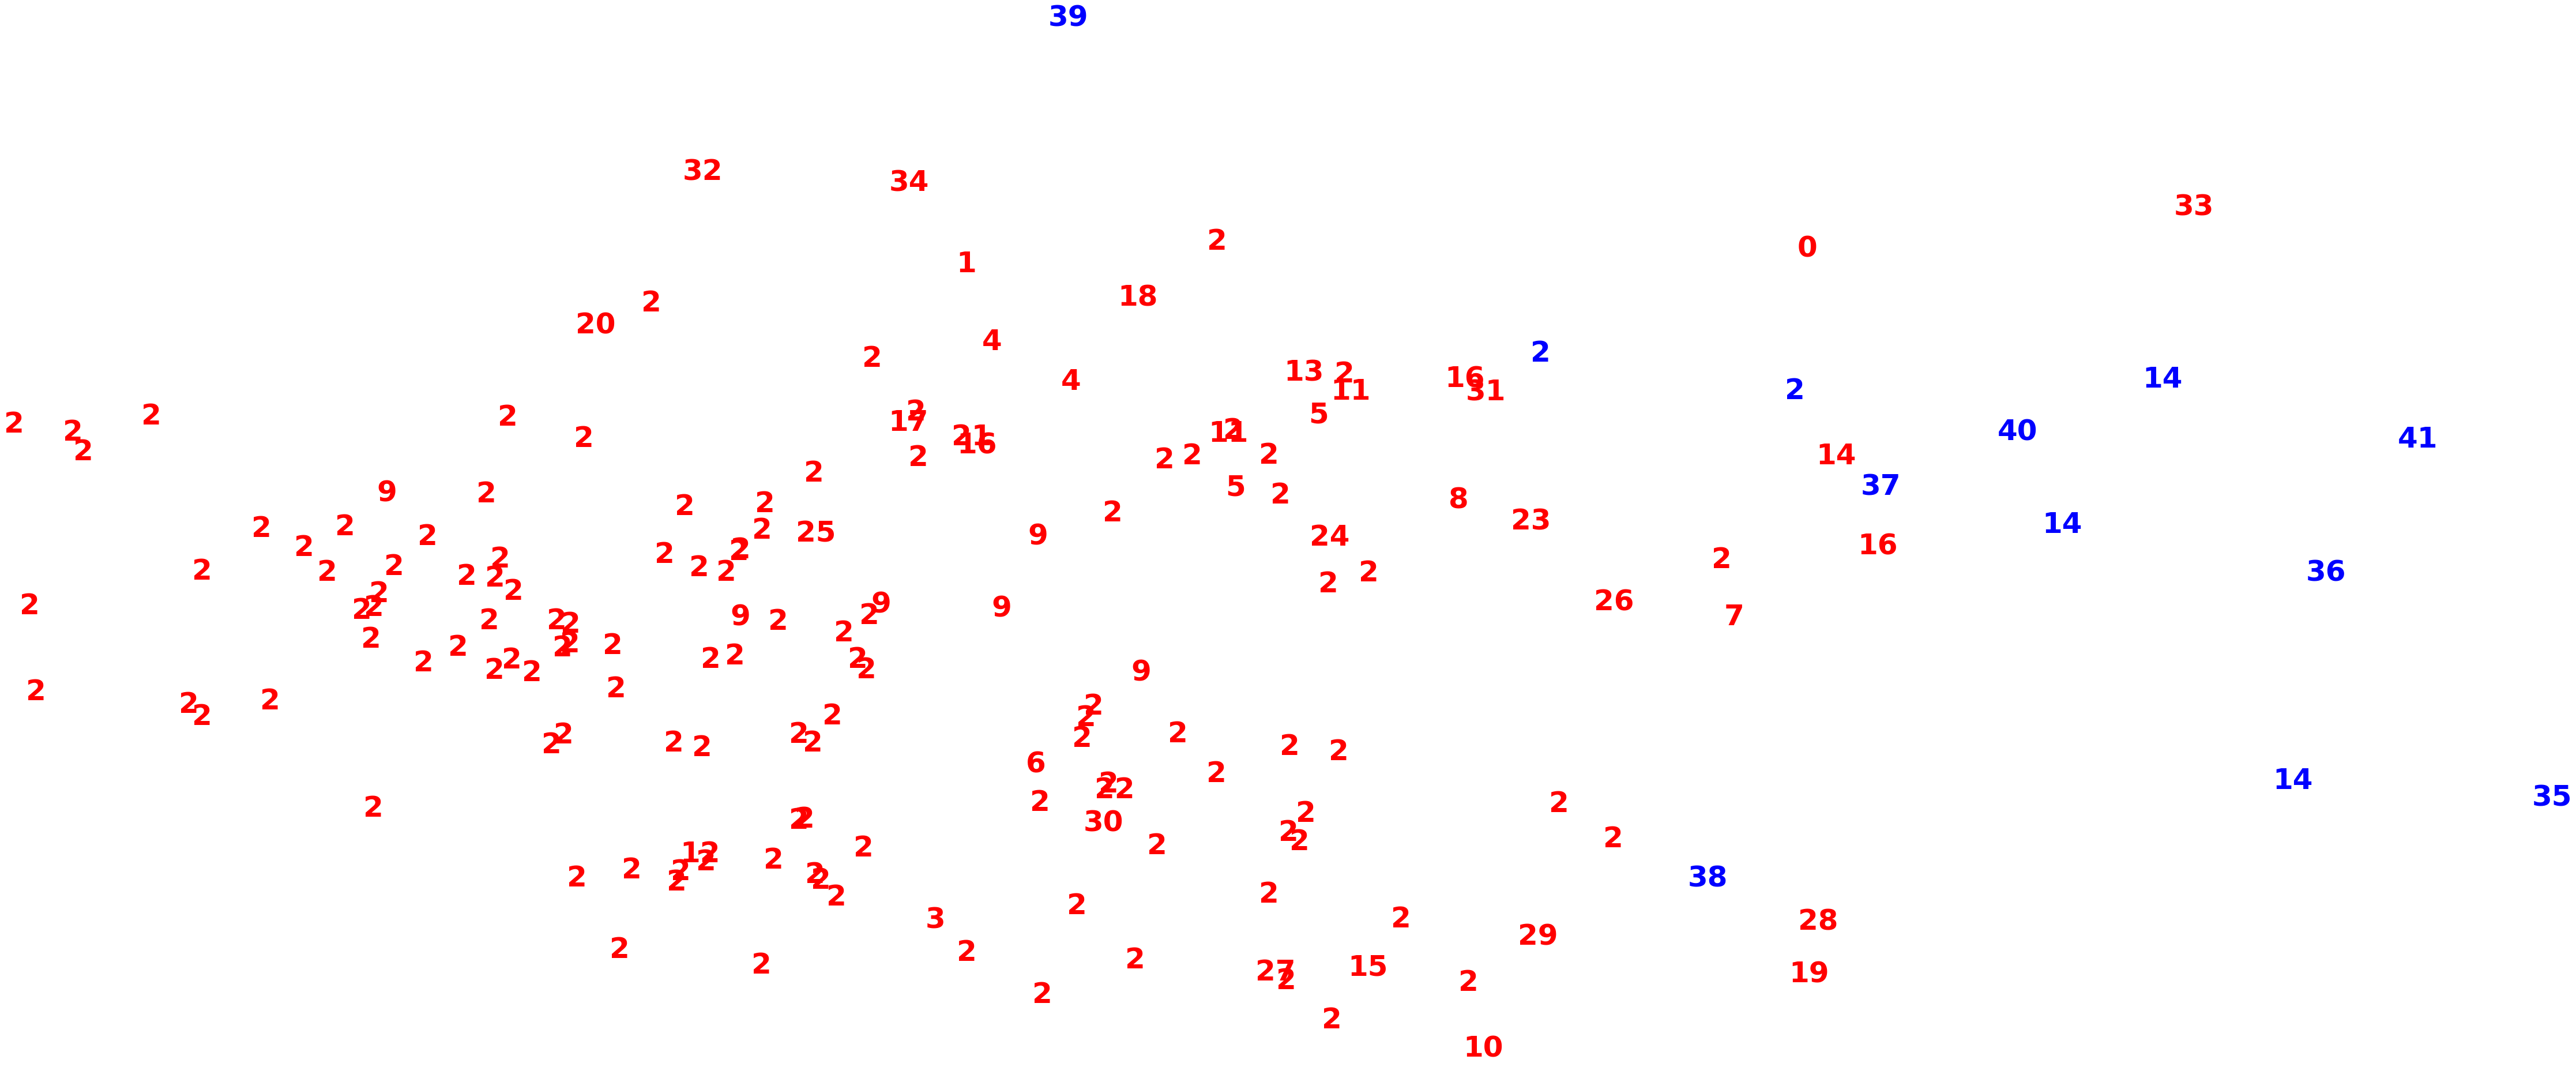

In [57]:
dbscan_cluster5 = DBSCAN(eps=3, min_samples=1)

clusters5 = dbscan_cluster5.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters5[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

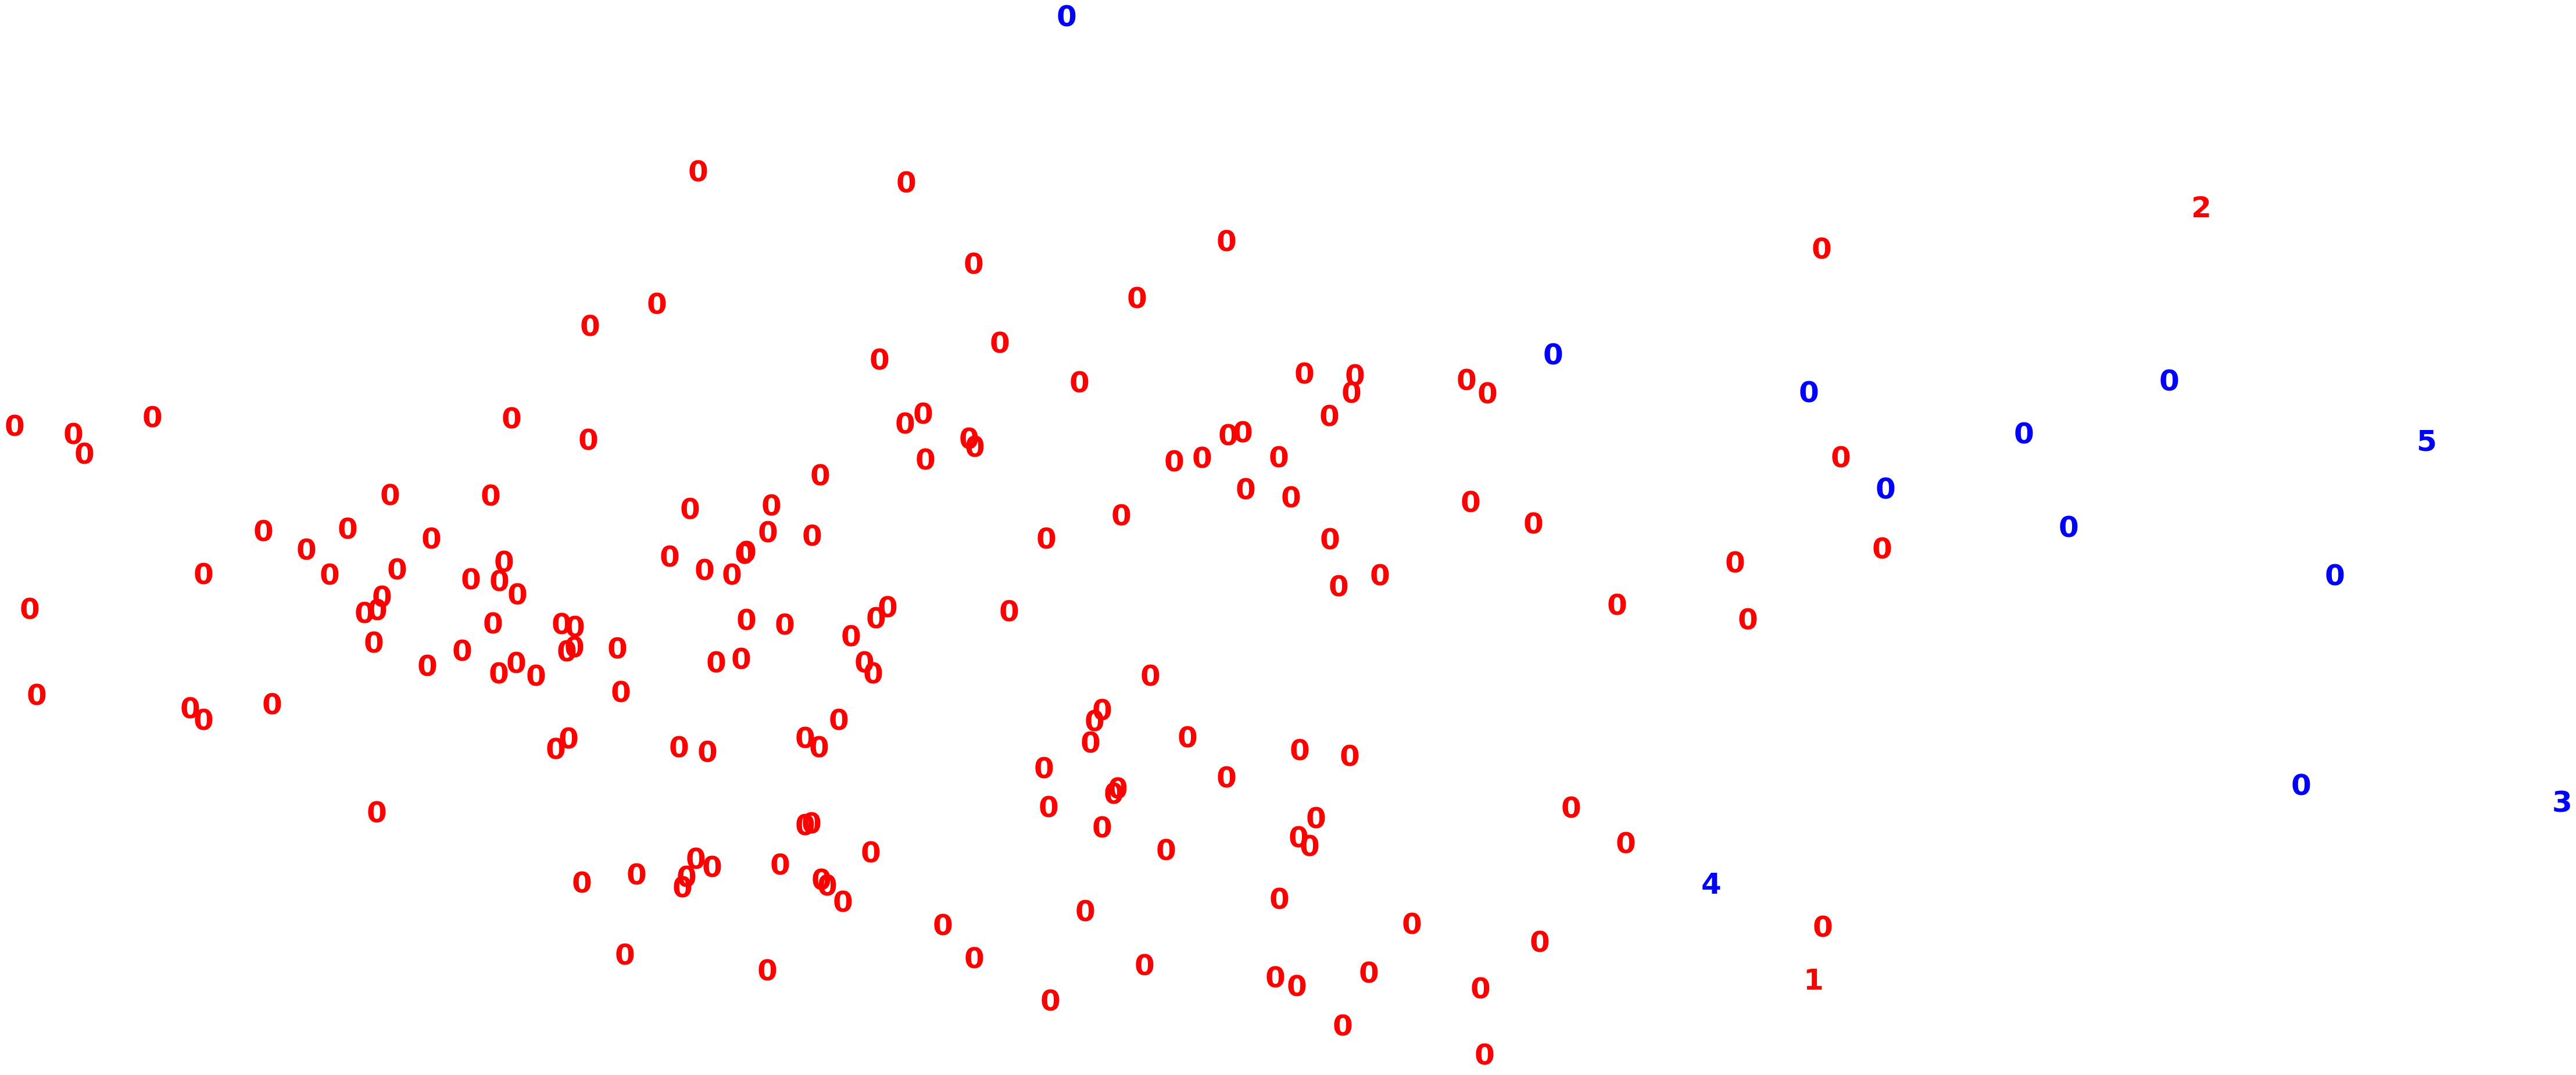

In [62]:
dbscan_cluster10 = DBSCAN(eps=4, min_samples=1)

clusters10 = dbscan_cluster10.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters10[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## 3. eps = 1, min_samples = 1, metric =" euclidean " şeklinde parametreleri ayarlayarak DBSCAN uygulayın. Ardından, eps değerini artırın. Artışın kümelerinin sayısı üzerindeki etkisi nedir?

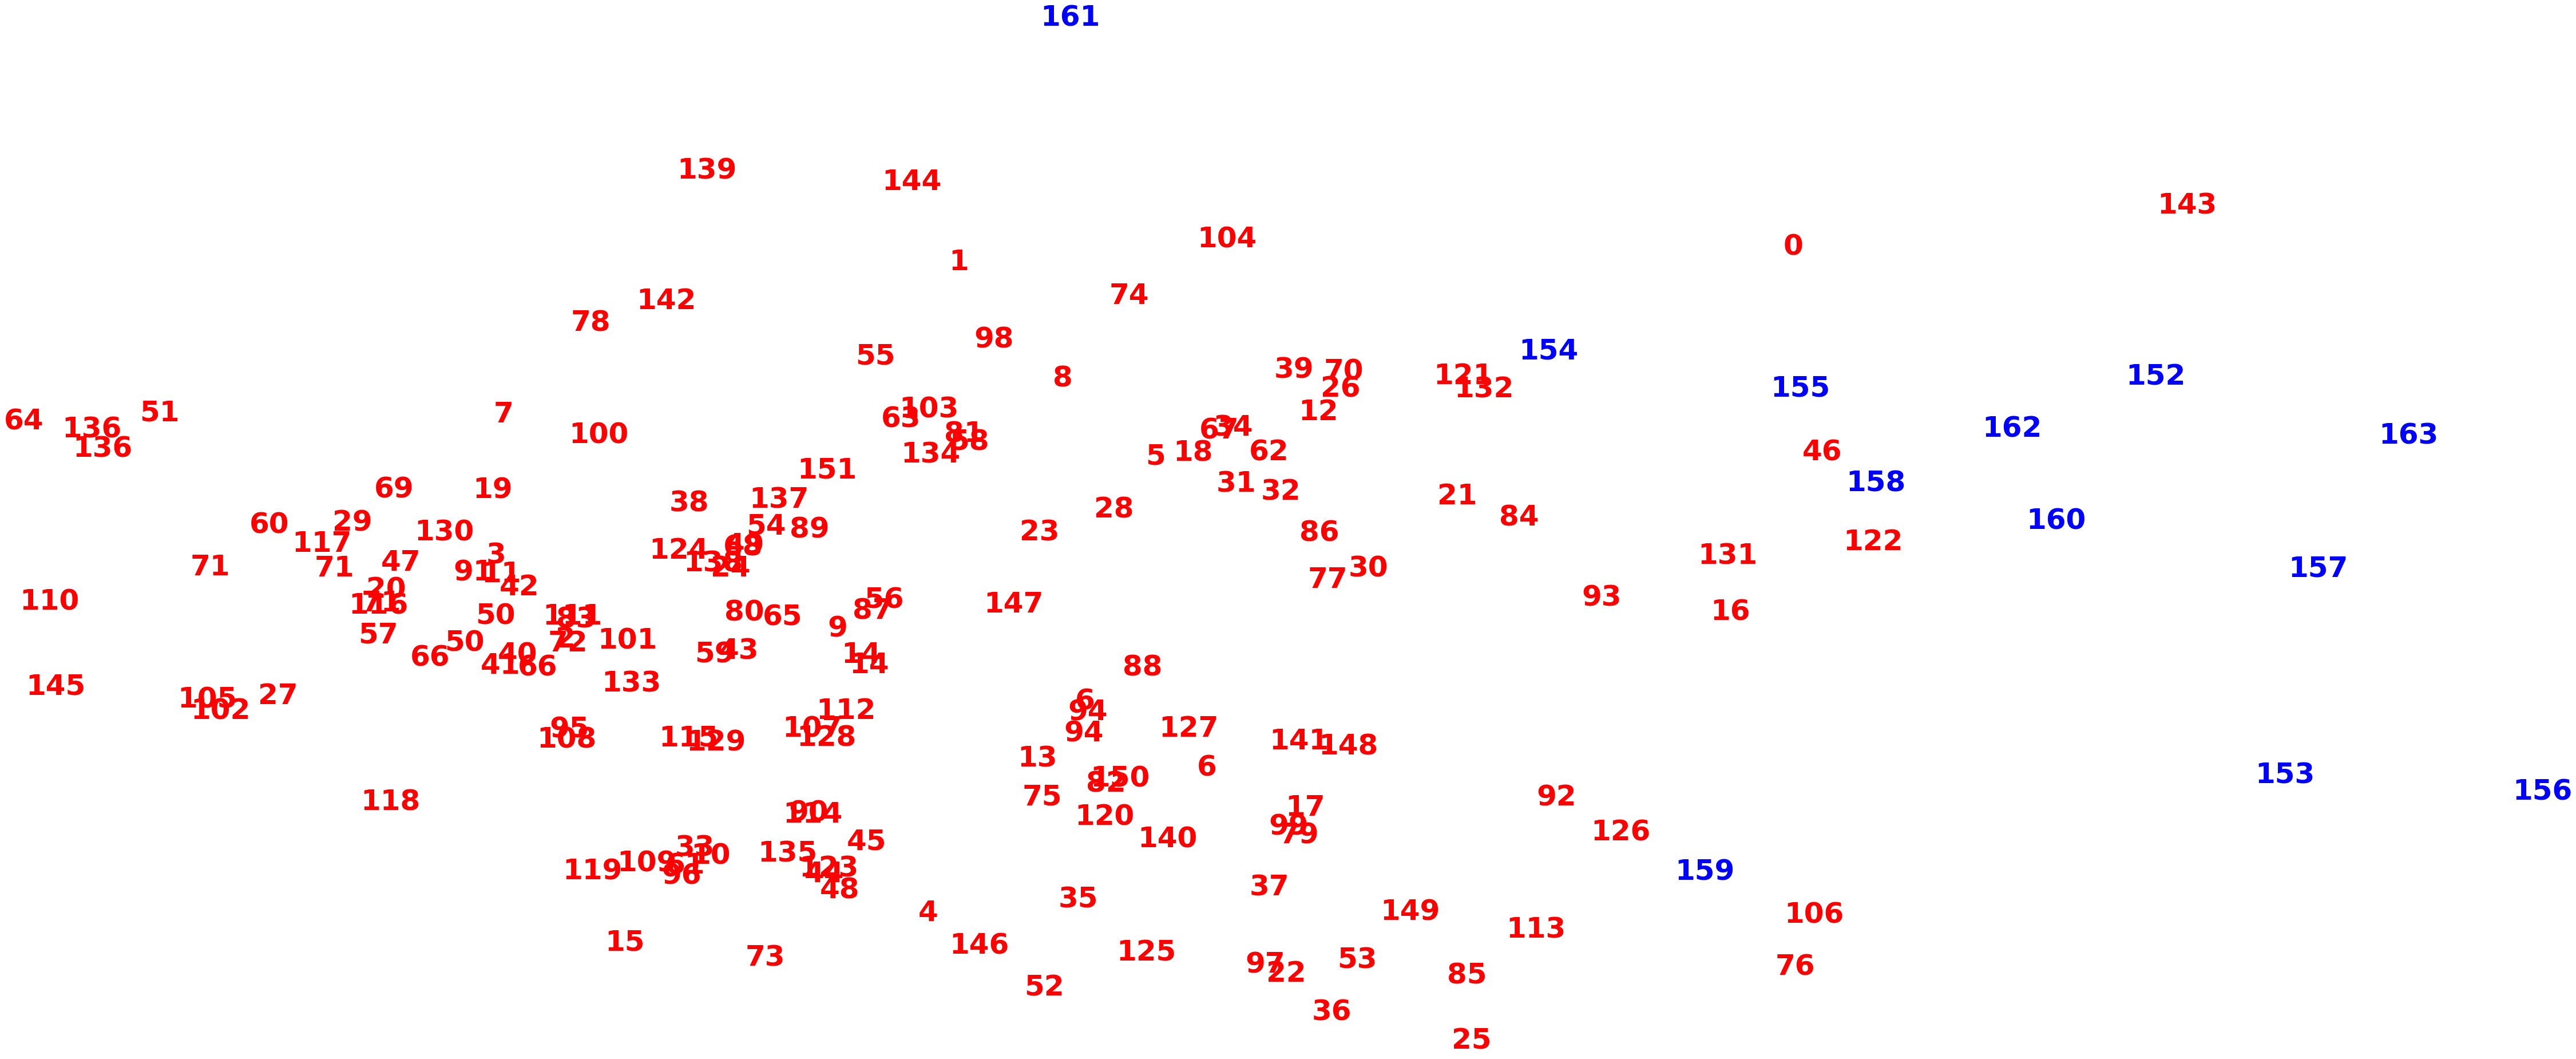

In [58]:
dbscan_cluster6 = DBSCAN(eps=1, min_samples=1)

clusters6 = dbscan_cluster6.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters6[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

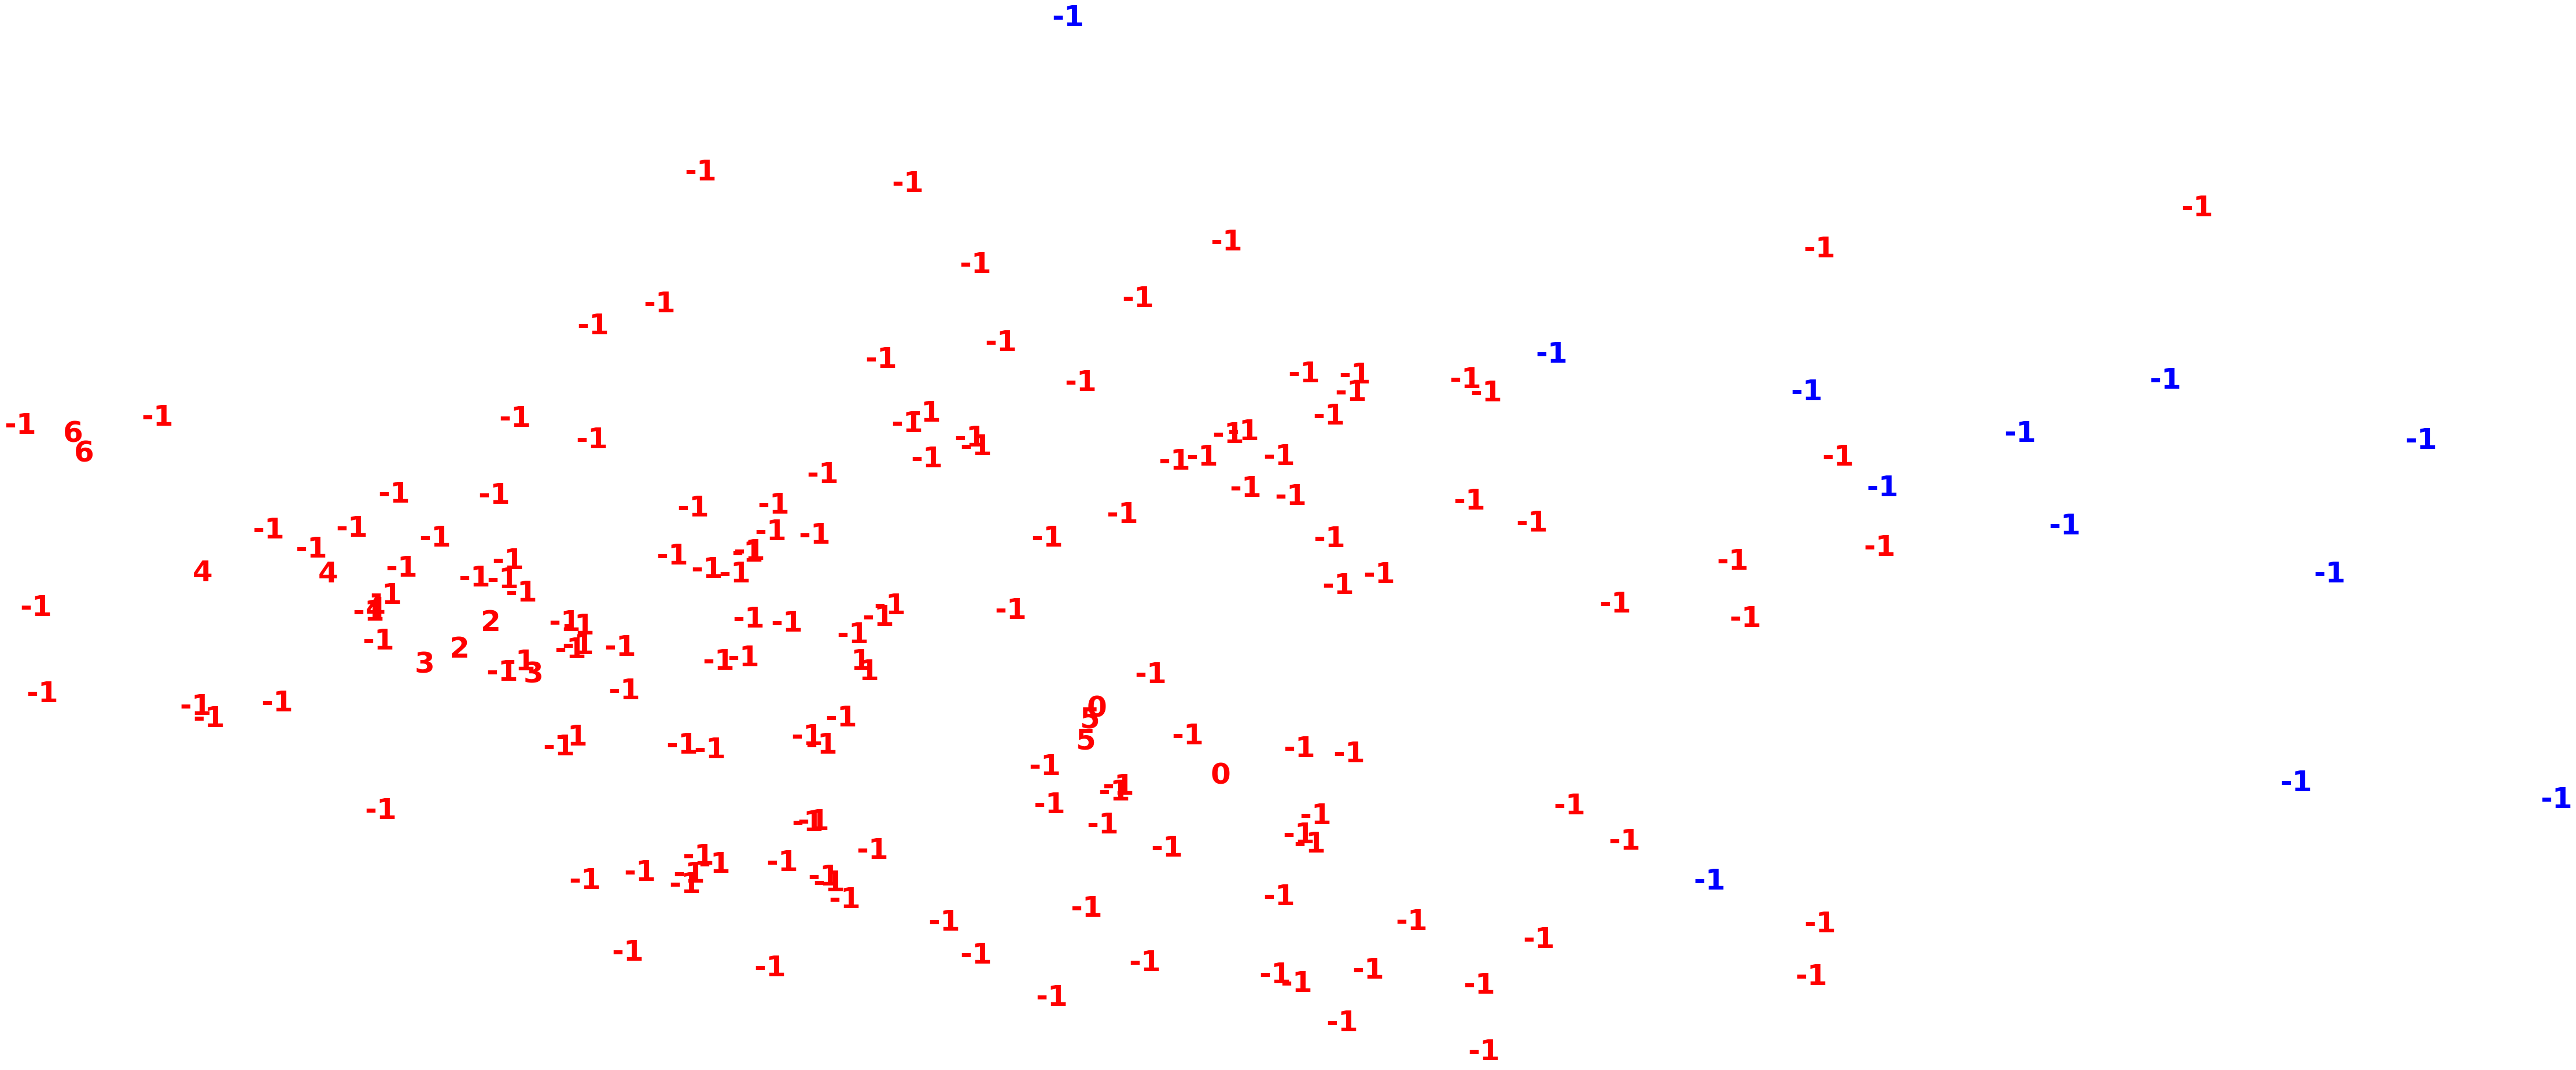

In [59]:
dbscan_cluster7 = DBSCAN(eps=1, min_samples=2)

clusters7 = dbscan_cluster7.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters7[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

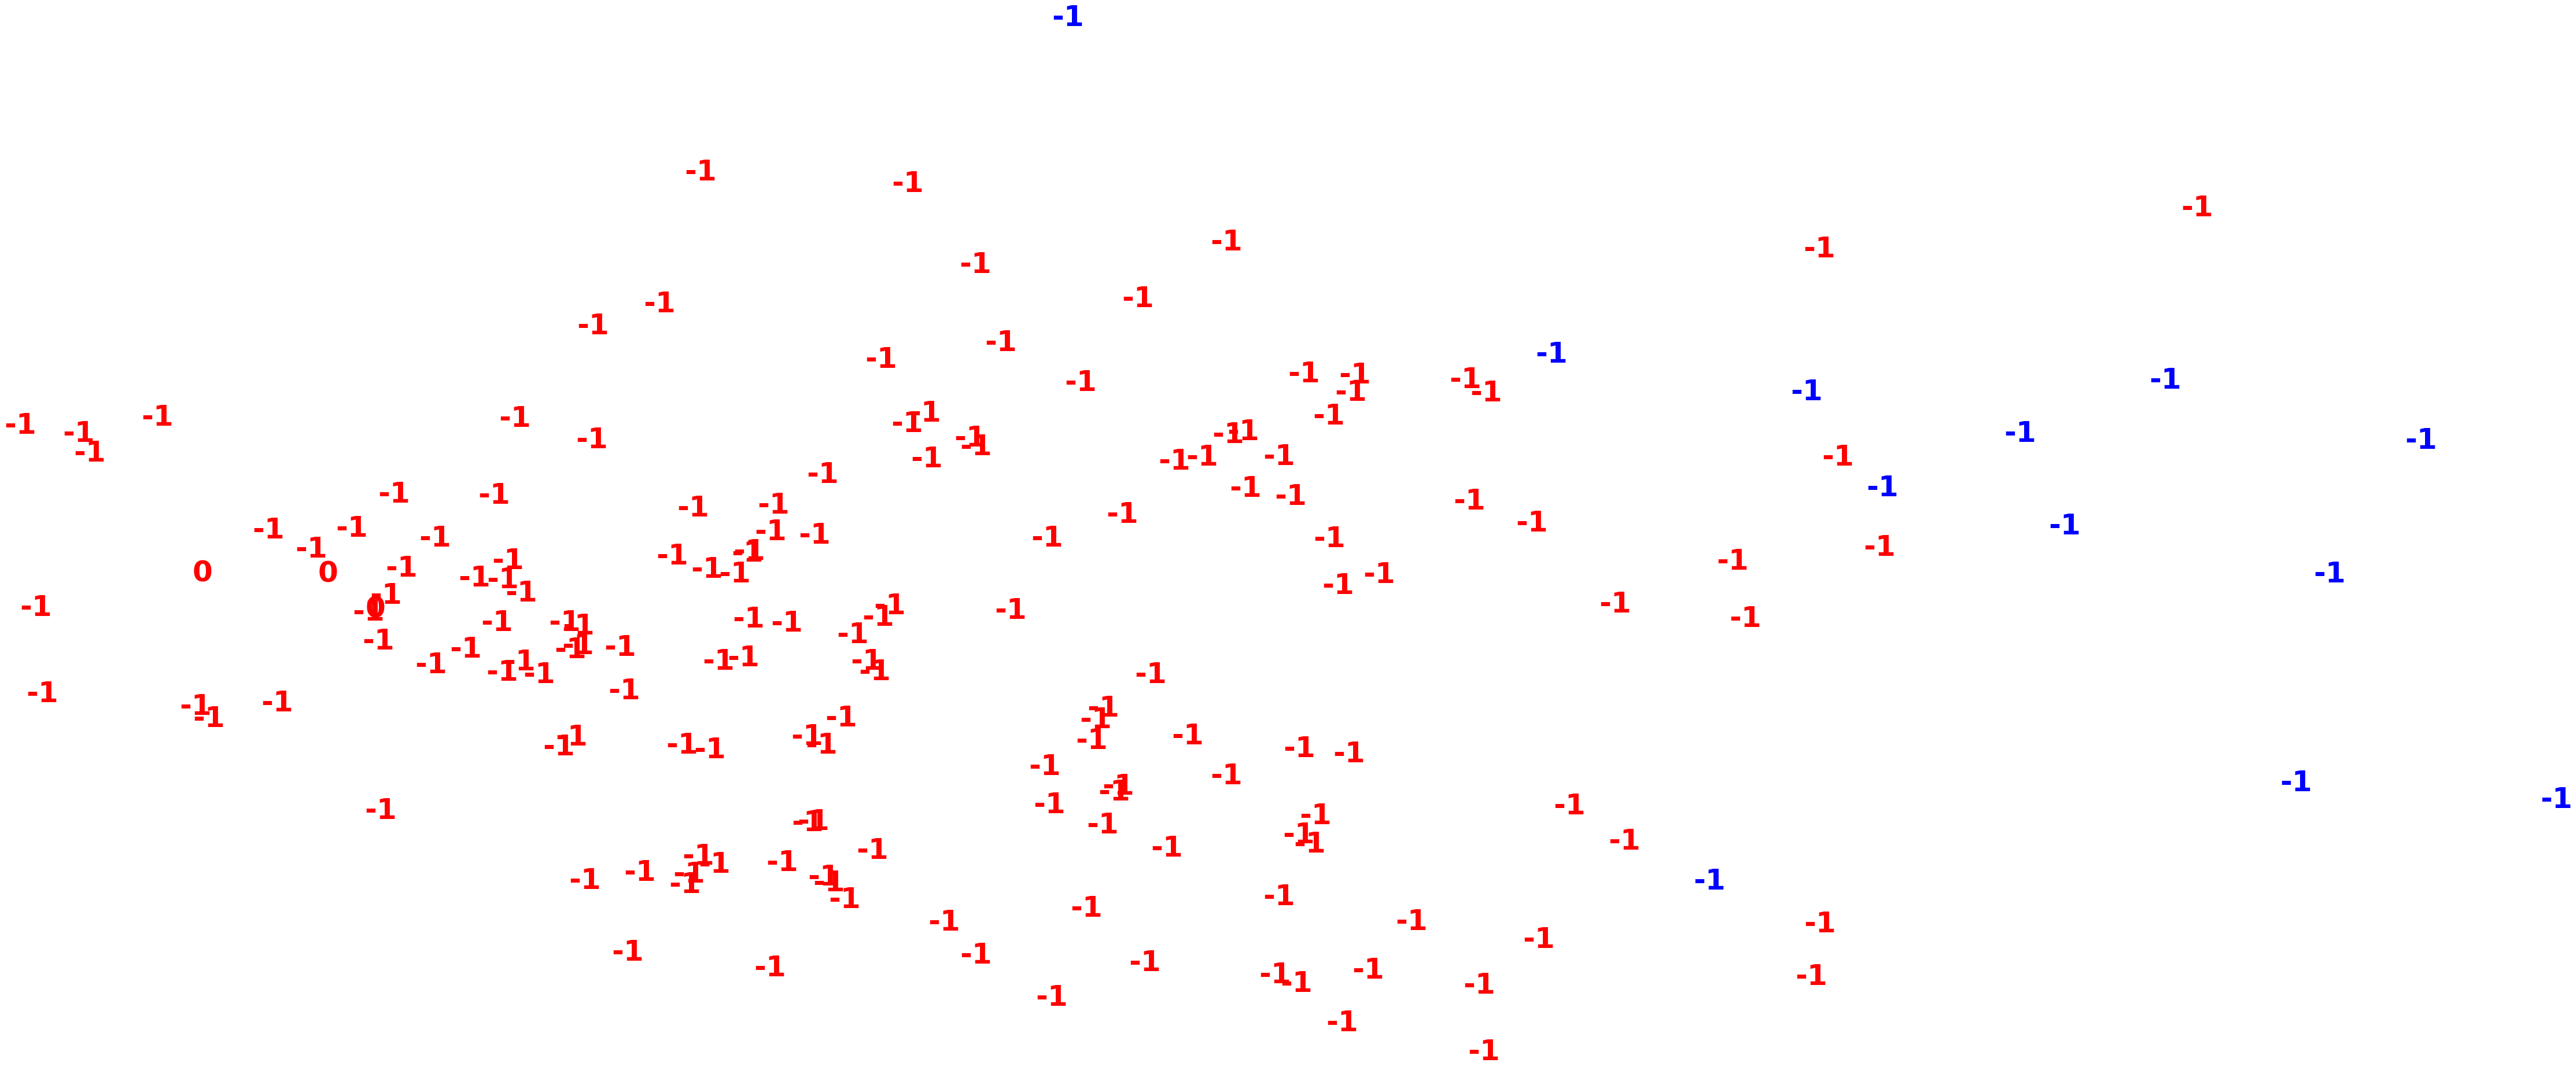

In [60]:
dbscan_cluster8 = DBSCAN(eps=1, min_samples=3)

clusters8 = dbscan_cluster8.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters8[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

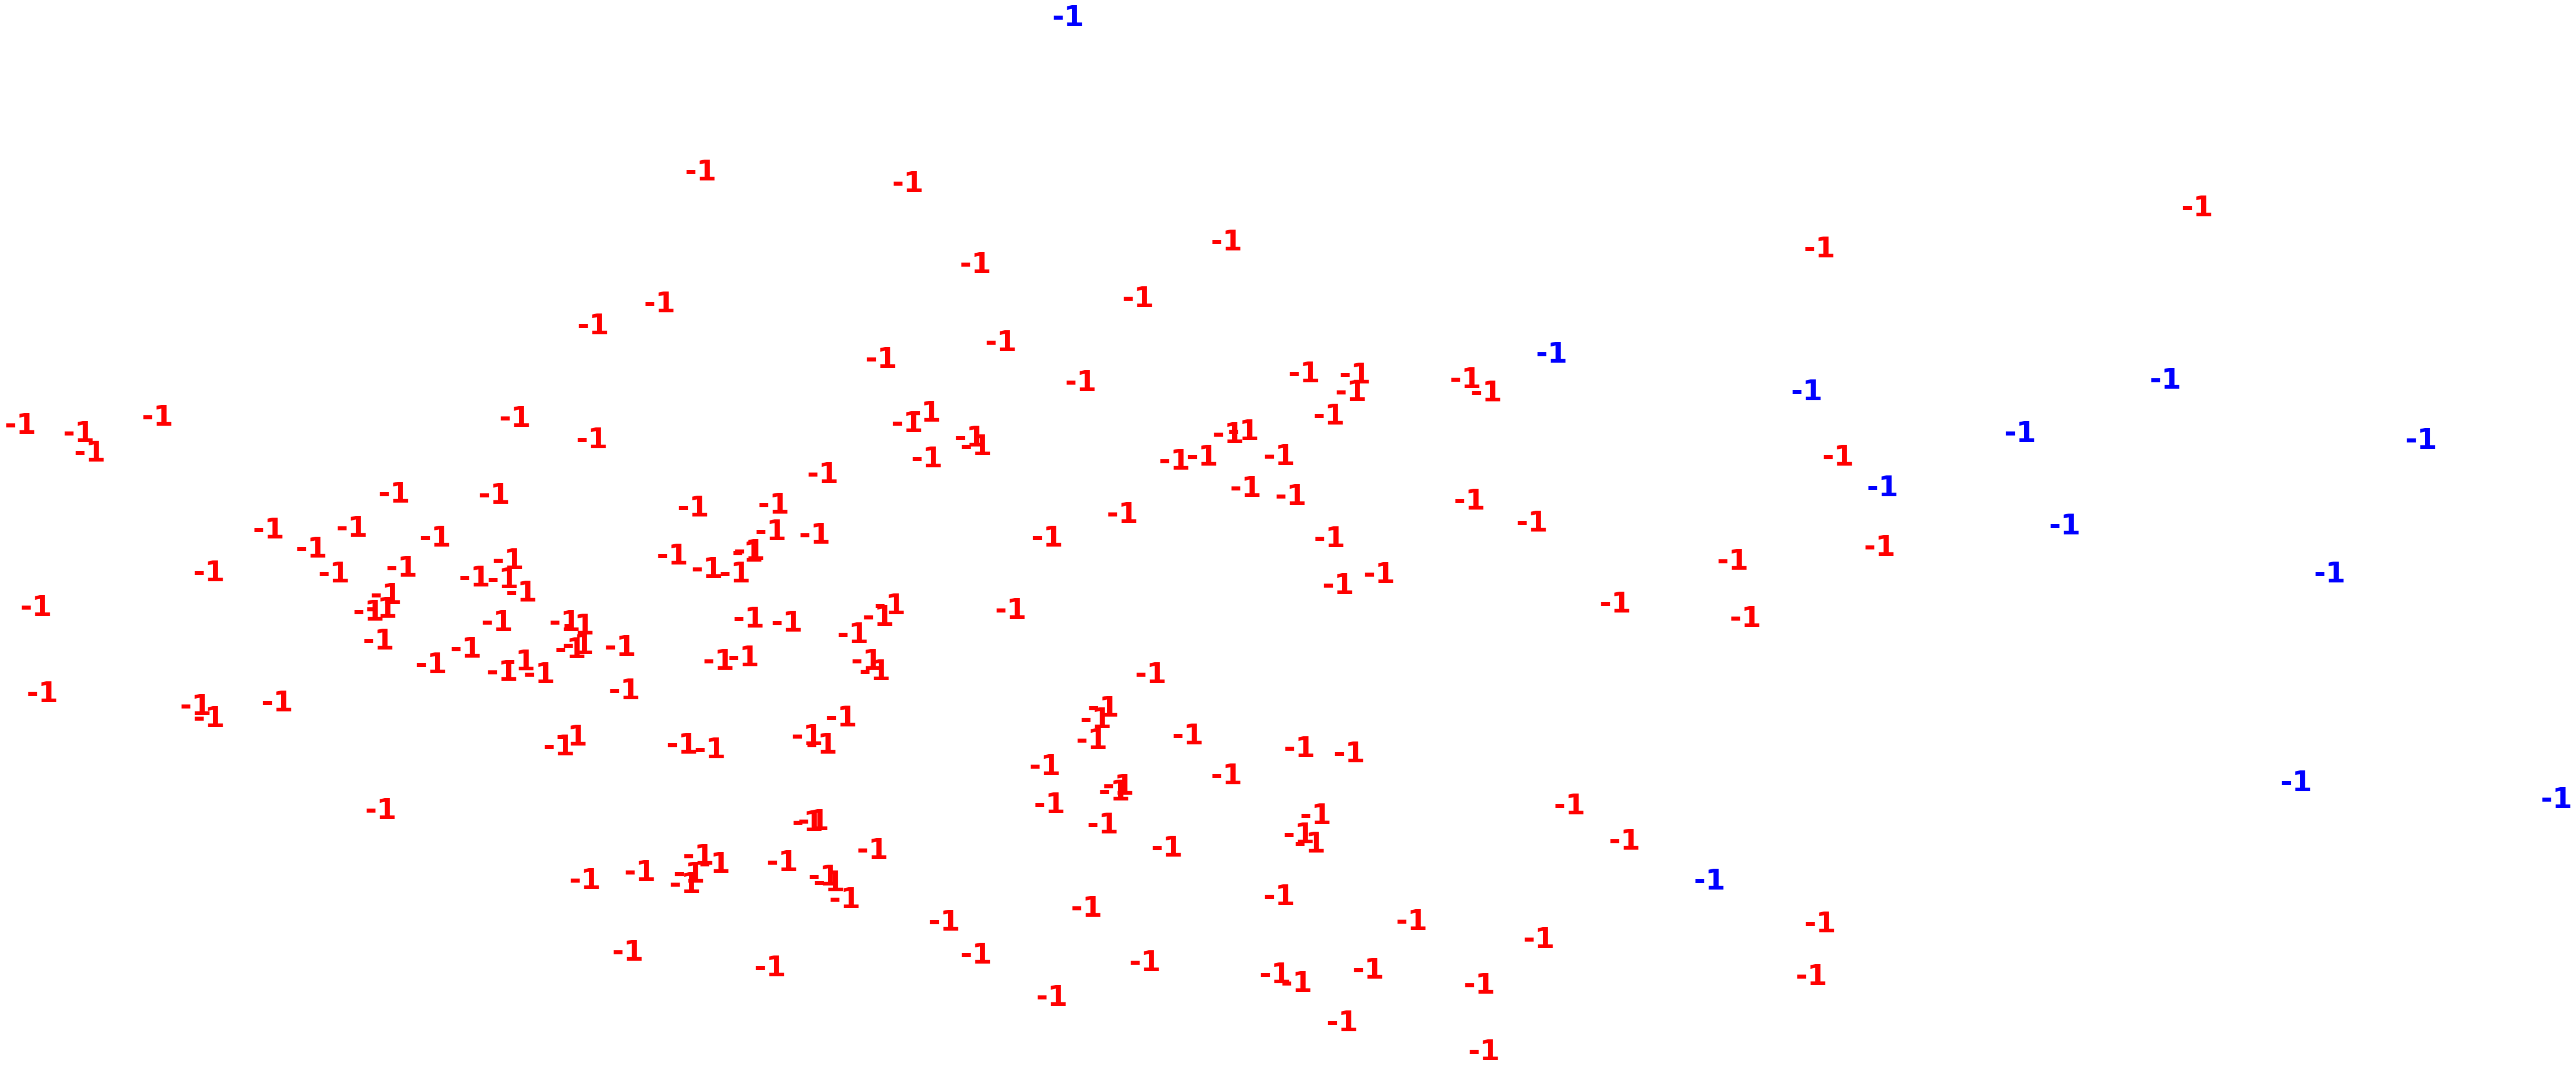

In [61]:
dbscan_cluster9 = DBSCAN(eps=1, min_samples=4)

clusters9 = dbscan_cluster9.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters9[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()